vancouver crime dataset
https://www.kaggle.com/wosaku/crime-in-vancouver

objectives:
- study evolution of crimes over the years
- study evolution of crmes over the months
- identify most frequent crimes
- identify areas most affected by crimes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv("vancouver crime.csv")

In [3]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
df.shape

(530652, 12)

In [5]:
df.dtypes

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
dtype: object

In [6]:
df.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.isna().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [8]:
df.isna().mean()

TYPE             0.000000
YEAR             0.000000
MONTH            0.000000
DAY              0.000000
HOUR             0.102444
MINUTE           0.102444
HUNDRED_BLOCK    0.000024
NEIGHBOURHOOD    0.106706
X                0.000000
Y                0.000000
Latitude         0.000000
Longitude        0.000000
dtype: float64

I decide to remove rows with NAs (10% of rows...I will still have 470k rows out of the 5300k initial rows)

In [9]:
df.dropna(inplace=True)

In [10]:
df["count"] = 1

I added a column...it will be useful when doing analyses later on

In [11]:
df.YEAR.describe()

count    474015.000000
mean       2009.176819
std           4.418367
min        2003.000000
25%        2005.000000
50%        2009.000000
75%        2013.000000
max        2017.000000
Name: YEAR, dtype: float64

we have infromation about crimes for the period 2003-2017

In [12]:
df.YEAR.value_counts().sort_index()

2003    45885
2004    45035
2005    40522
2006    37767
2007    33161
2008    31070
2009    28197
2010    25874
2011    24633
2012    25378
2013    25323
2014    29430
2015    31020
2016    34515
2017    16205
Name: YEAR, dtype: int64

In [13]:

year = df.YEAR.value_counts().sort_index().index
crimes_by_year = df.YEAR.value_counts().sort_index().values

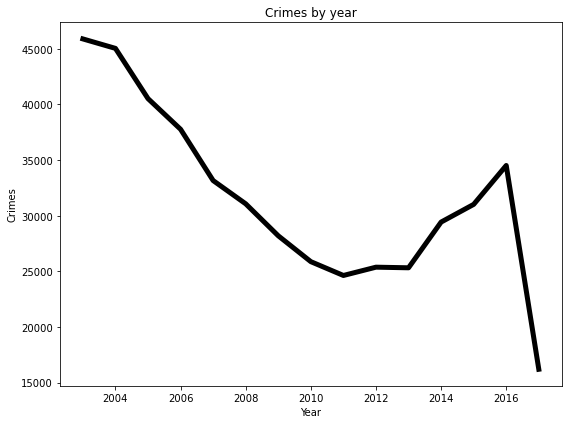

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(2003,2018),crimes_by_year, color = "black", linewidth= 5)
plt.title("Crimes by year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.tight_layout()


crimes have decreased considerably between 2003 and 2011. Starting from 2011 crimes have increased again before falling drastically in 2017

In [15]:
df.MONTH.value_counts().sort_index()

1     40228
2     36113
3     40545
4     39475
5     41837
6     41869
7     40686
8     40862
9     39216
10    39821
11    37546
12    35817
Name: MONTH, dtype: int64

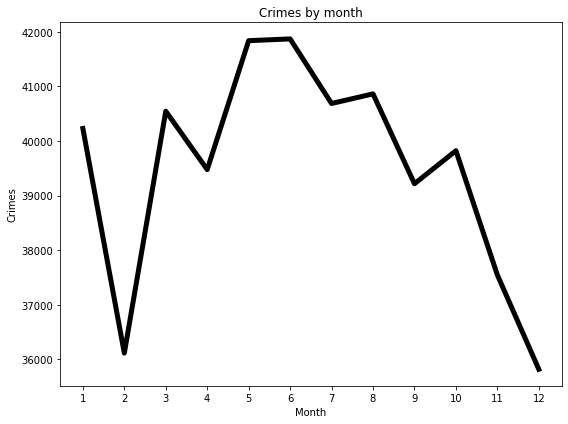

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1,13),df.MONTH.value_counts().sort_index().values, color = "black", linewidth= 5)
plt.xticks(ticks=range(1,13))
plt.xlabel("Month")
plt.ylabel("Crimes")
plt.title("Crimes by month")
plt.tight_layout()

It seems that spring/summer are the seasons with the greatest number of crimes.
Crimes increases consistently during spring and summer month and decreases during autumn and winter.
Interestingly January is characterized by a significantly greater number of crimes compared to other winter months.


In [17]:
df.TYPE.unique()

array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Theft of Vehicle', 'Theft of Bicycle'], dtype=object)

List of recorded crimes

In [18]:
df.TYPE.value_counts(normalize=True).sort_values(ascending=False)

Theft from Vehicle                                        0.360514
Mischief                                                  0.148006
Break and Enter Residential/Other                         0.128384
Other Theft                                               0.110039
Theft of Vehicle                                          0.080907
Break and Enter Commercial                                0.071392
Theft of Bicycle                                          0.054049
Vehicle Collision or Pedestrian Struck (with Injury)      0.046174
Vehicle Collision or Pedestrian Struck (with Fatality)    0.000536
Name: TYPE, dtype: float64

The great majority of crimes (37%) consist in theft from Vehicle

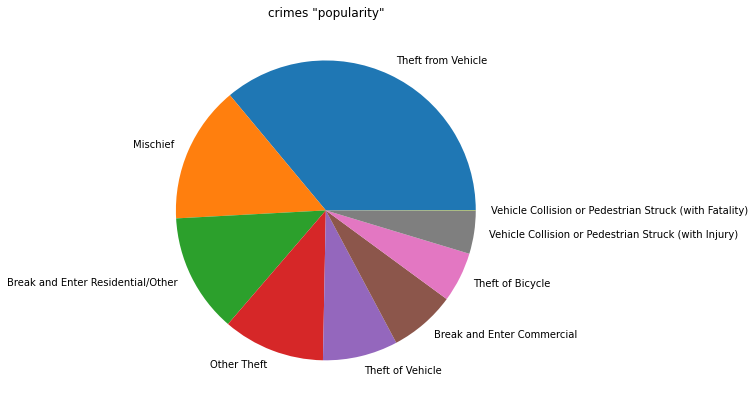

In [19]:
plt.figure(figsize=(10,10))
plt.pie(x = df.TYPE.value_counts(normalize=True).sort_values(ascending=False).values, labels=df.TYPE.value_counts(normalize=True).sort_values(ascending=False).index)
plt.title('crimes "popularity"')
plt.tight_layout()

I want to analyze the evolution of the 4 most popular crimes between 2003 and 2017

In [31]:
crimes = df.loc[(df.TYPE == "Theft from Vehicle") | (df.TYPE == "Mischief") | (df.TYPE == "Break and Enter Residential/Other") | (df.TYPE == "Other Theft")]

In [50]:
theft_from_vehicle = crimes.loc[df.TYPE == "Theft from Vehicle"].YEAR.value_counts().sort_index().values
mischief = crimes.loc[df.TYPE == "Mischief"].YEAR.value_counts().sort_index().values
break_and_enter = crimes.loc[df.TYPE == "Break and Enter Residential/Other"].YEAR.value_counts().sort_index().values
other_theft = crimes.loc[df.TYPE == "Other Theft"].YEAR.value_counts() .sort_index().values

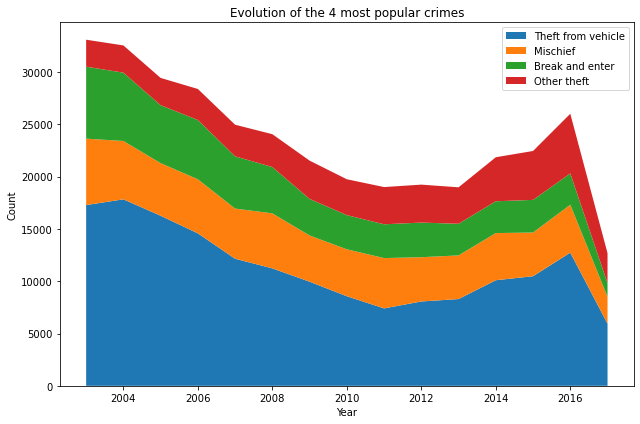

In [59]:
plt.figure(figsize=(9,6))
plt.stackplot(range(2003,2018),theft_from_vehicle ,mischief, break_and_enter, other_theft, labels=["Theft from vehicle", "Mischief", "Break and enter", "Other theft"])
plt.legend(loc= "upper right")
plt.xlabel("Year")
plt.ylabel("Count")

plt.title("Evolution of the 4 most popular crimes")
plt.tight_layout()

while all crimes have decreased in the timeperiod considered the "other theft" category has increased.

Now I want to further analyze the crime theft from vehicle

First of all I want to see at what times theft from vehicke occurs

In [65]:
df.loc[df.TYPE == "Theft from Vehicle"].HOUR.value_counts(normalize= True).sort_values(ascending = False)

18.0    0.086869
22.0    0.076365
19.0    0.070672
21.0    0.068272
20.0    0.067693
17.0    0.067166
0.0     0.064709
23.0    0.061759
16.0    0.051923
12.0    0.047083
15.0    0.043777
14.0    0.037071
13.0    0.033197
9.0     0.032442
8.0     0.030570
10.0    0.028001
11.0    0.027392
1.0     0.023337
7.0     0.020686
2.0     0.016239
6.0     0.013559
3.0     0.011510
5.0     0.009930
4.0     0.009778
Name: HOUR, dtype: float64

It looks like the great majority of thefts from vehicles (around 40%) occur between 5 pm and 10 pm

Now I want to identify the neighbourhoods more affected by this crime

In [20]:
df.loc[df.TYPE == "Theft from Vehicle"].NEIGHBOURHOOD.value_counts()

Central Business District    48003
West End                     16904
Fairview                     11934
Mount Pleasant                9678
Kitsilano                     8912
Renfrew-Collingwood           8420
Kensington-Cedar Cottage      7474
Strathcona                    7343
Grandview-Woodland            7342
Hastings-Sunrise              5654
Sunset                        5226
Riley Park                    4269
Marpole                       4151
Killarney                     3990
Victoria-Fraserview           3390
Dunbar-Southlands             2899
Stanley Park                  2868
Kerrisdale                    2805
Oakridge                      2290
West Point Grey               1970
Arbutus Ridge                 1852
Shaughnessy                   1769
South Cambie                  1529
Musqueam                       217
Name: NEIGHBOURHOOD, dtype: int64

we can identify some neighbourhoods that are particularly affected by the crime "theft from vehicle"
I now want to display on a map the central business district neighbourhood. I will only take into consideration 2017 data. 
The objective is to identify where we shouldn't park in the CDB and where it is safer (less risky) to park

In [21]:
vancouver_map1 = folium.Map(location= [49.24, -123.11], zoom_start = 12)

In [22]:
theft_from_vehicle_2017 = df.loc[(df.TYPE == "Theft from Vehicle") & (df.YEAR == 2017)& (df.NEIGHBOURHOOD == "Central Business District")]

In [23]:
heat_data = [[row['Latitude'],row['Longitude']] for index, row in theft_from_vehicle_2017.iterrows()]
HeatMap(heat_data).add_to(vancouver_map1)

In [24]:
vancouver_map1

heatmap areas of the Central Business district afftected by the crime "theft from vehicle"

In [25]:
theft_of_vehicle_2017 = df.loc[(df.TYPE == "Theft of Vehicle") & (df.YEAR == 2017)]

In [26]:
vancouver_map2 = folium.Map(location= [49.24, -123.11], zoom_start = 12)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in theft_of_vehicle_2017.iterrows()]
HeatMap(heat_data).add_to(vancouver_map2)

In [27]:
vancouver_map2

heat map showing areas of vancouver more affected by the crime "Theft of vehicle"(again areas where we shouldn't leave our car)

In [28]:
vancouver_map3 = folium.Map(location= [49.24, -123.11], zoom_start = 12)
Break_and_enter_2017 = df.loc[(df.TYPE == "Break and Enter Residential/Other") & (df.YEAR == 2017)]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in Break_and_enter_2017.iterrows()]
HeatMap(heat_data).add_to(vancouver_map3)

In [66]:
vancouver_map3

heatmap showing areas of Vancouver more affected by the crime "break and enter residential properties". (areas where we probably shouldn't by houses or where we should increase the security of our houses to prevent people from entering)

they previous analyses can be further customized choosing the crime we want to investigate and see where it is most frequent in Vancouver or taking into consideration only a specific neighbourhood.

SUMMARY OF WHAT I DID:
I have been able to identify the trend of crimes in Vancouver and understand which months are characterized by a greater frequency of crimes.
Then I've been able to identify which crimes happen more frequently and, looking at the 4 most popular crimes, study how the've evolved between 2003 and 2017.
I then carried out some further analyses focusing more specifically on theft from vehicle which is the most popular crime.
I've identified the neighbourhoods where this crime happen the most and the daytime in which there's a greater chance of experiencing this crime. 
I've also used heatmaps to identify, given a particular neighbourhood, the areas where crimes are more frequent. In the case of theft from vehicle this is particularly helpful to know which are the riskiest areas and where we should park to reduce the risk of having something stolen from our car.
This analysis carried out with heatmap is particularly effective in displaying on a map the most dangerous areas rather then just providing alist of streets.
